Matching Colin's  Si values to Rich's salinity values

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import datetime
import xarray as xr
from salishsea_tools import tidetools, geo_tools, viz_tools
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [60]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

In [3]:
nutrients_2015 = pd.read_excel('/home/eolson/Desktop/PSFbottledata_CN_edits_EOCor.xlsx')

In [4]:
ctd_2015 = sio.loadmat('/ocean/rich/home/metro/venus_adcp/matlabPSF/CitSci_Final.mat')

In [6]:
ctd_data = ctd_2015[list(ctd_2015.keys())[3]]
ctd_dtype = ctd_data.dtype
ctddata = {n: ctd_data[n][0, 0] for n in ctd_dtype.names}
ctd_times = ctd_data['mtime'][0,0][0,:]
print(ctd_times.shape)

(2142,)


In [7]:
ctd_sals = ctd_data['sal'][0,0][:,:]
ctd_depths = ctd_data['depth'][0,0][:,:]
ctd_lons = ctd_data['long'][0,0][0,:]
ctd_lats = ctd_data['lat'][0,0][0,:]

In [8]:
base = datetime.datetime(2000, 1, 1)
py_ctd_times = np.array([base for i in range(2142)])
print(py_ctd_times.shape)
for n in range(2142):
    py_ctd_times[n] = ((datetime.datetime.fromordinal(int(ctd_times[n])))
                       + datetime.timedelta(days=ctd_times[n]%1)
                       - datetime.timedelta(days = 366))

(2142,)


In [44]:
stations = nutrients_2015['station'].values
days = np.array([pd.to_datetime(pd.Timestamp(d)) for d in nutrients_2015['date'].values])
depths = nutrients_2015['depth'].values
si = nutrients_2015['si'].values
lons = nutrients_2015['lon'].values
lats = nutrients_2015['lat'].values

In [39]:
import pandas as pd

In [26]:
False == 0

True

In [48]:
stations = np.ma.masked_array(stations, mask = np.zeros((896)))
for n in range(896):
    if stations[n][:2] != 'CB':
        stations.mask[n] = True

In [49]:
days = np.ma.masked_array(days, mask = stations.mask)
depths = np.ma.masked_array(depths, mask = stations.mask)
si = np.ma.masked_array(si, mask = stations.mask)
lons = np.ma.masked_array(lons, stations.mask)
lats = np.ma.masked_array(lats, mask = stations.mask)

In [55]:
py_ctd_times.shape

(2142,)

In [56]:
depths[:5]

masked_array(data = [2 20 20 20 --],
             mask = [False False False False  True],
       fill_value = 999999)

In [74]:
si_to_use = np.array([])
sal_to_use = np.array([])
for i in range(896):
    same_day_index = np.array([])
    if days.mask[i] == False:
        for n in range(2142):
            if ((py_ctd_times[n].day == days[i].day) 
                and (py_ctd_times[n].month == days[i].month)):
                same_day_index = np.append(same_day_index, n)
        if len(same_day_index) != 0:
            same_day_times = np.array([py_ctd_times[p] for p in same_day_index])
            same_day_lons = np.array([ctd_lons[m] for m in same_day_index])
            same_day_lats = np.array([ctd_lats[l] for l in same_day_index])
            if depths[n] == 2:
                same_day_sals = np.array([ctd_sals[0, l] for l in same_day_index])
            else:
                same_day_sals = np.array([ctd_sals[19, l] for l in same_day_index])
            a = np.argmin(np.abs(same_day_lats - lats[i]))
            b = np.argmin(np.abs(same_day_lons - lons[i]))
            if (a-b) == 0:
                si_to_use = np.append(si_to_use, n_si[i])
                depth_to_use = np.append(depth_to_use, n_depths[i])
                sal_to_use = np.append(sal_to_use, same_day_sals[a])

/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: index 2141 is out of bounds for axis 0 with size 896

In [82]:
si_to_use = np.array([])
sal_to_use = np.array([])
depth_to_use = np.array([])
for i in range(896):
    same_day_index = np.array([])
    if days.mask[i] == False:
        for n in range(2142):
            if ((py_ctd_times[n].day == days[i].day) 
                and (py_ctd_times[n].month == days[i].month)):
                same_day_index = np.append(same_day_index, n)
        if len(same_day_index) != 0:
            same_day_times = np.array([py_ctd_times[p] for p in same_day_index])
            same_day_lons = np.array([ctd_lons[m] for m in same_day_index])
            same_day_lats = np.array([ctd_lats[l] for l in same_day_index])
            if depths[i] == 2:
                same_day_sals = np.array([ctd_sals[0, l] for l in same_day_index])
            else:
                same_day_sals = np.array([ctd_sals[19, l] for l in same_day_index])
            a = np.argmin(np.abs(same_day_lats - lats[i]))
            b = np.argmin(np.abs(same_day_lons - lons[i]))
            if (a-b) == 0:
                si_to_use = np.append(si_to_use, si[i])
                depth_to_use = np.append(depth_to_use, depths[i])
                sal_to_use = np.append(sal_to_use, same_day_sals[a])

/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


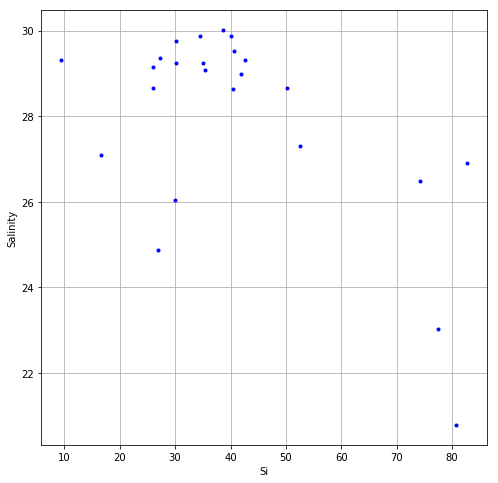

In [85]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(si_to_use, sal_to_use, 'b.')
ax.grid('on')
ax.set_xlabel('Si')
ax.set_ylabel('Salinity')